# Part I - Exploratory Data Analysis: Prosper Loan Dataset

## by Ridwan Omotosho

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

I will be reading the dataset(Prosper Loan Data)into my NB.

In [2]:
loan_data = pd.read_csv('prosperLoanData.csv')

- Structure of dataset

In [3]:
loan_data.shape

(113937, 81)

We have 113937 rows and 81 columns.

Let's take a look at the overview of our dataset.

In [4]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


I will only choose the 81 columns that are relevant to our investigation of the loan out of the 113937 rows and 81 columns. I'll select 15 or so columns to research. These columns pertain to the loan amount, dates, interest rates, and other borrower characteristics.

In [5]:
df_loan = loan_data.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

In [6]:
df_loan.duplicated().sum()


0

In [7]:
df_loan.isnull().sum()


ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64

In [8]:
df_loan.head()


,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


In [9]:
#Convert datatype for all other categorical columns and datetime
df_loan['Occupation'] = df_loan['Occupation'].astype('category')
df_loan['BorrowerState'] = df_loan['BorrowerState'].astype('category')
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')
df_loan['ListingCategory (numeric)'] = df_loan['ListingCategory (numeric)'].astype('category')
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate']) 
df_loan['ClosedDate'] = pd.to_datetime(df_loan['ClosedDate'])
df_loan['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate'])
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   object        
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 110349 non-null  category

In [11]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

In [12]:
df_loan['ProsperRating (Alpha)'].value_counts()


C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [13]:
df_loan['IncomeRange'].value_counts()


$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

In [14]:
df_loan['Occupation'].value_counts()


Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [15]:
df_loan.shape


(113937, 22)

In [16]:
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   category      
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 110349 non-null  category

### What is the structure of your dataset?
>There are 22 columns and 113937 rows in the dataset. The majority of the columns are numerical, but we also include date/time variables and categorical variables (both nominal and ordinal).

### What is/are the main feature(s) of interest in your dataset?
If necessary, I will deal with the borrower rate, borrower APR, prosper score, credit score, initial loan amount, monthly payment, occupation, state, and other factors.
 >There are some important features to look at including:

- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best or  lowest risk score. Applicable for loans originated after July 2009.
- LoanOriginationDate: The date the loan was originated.
- LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The Borrower's APR, Borrower's Rate, Stated Monthly Income, Loan Original Amount, Monthly Loan Payment, Occupation and Employment status. 
> Exploring the relationship between these features will help in understanding the datasets, the monthly loan payment and occupation will have effects on the loan and other featurs so we will be investigating it. 

## Univariate Exploration
I will start with the most important features: Borrower APR , Prosper Score and Loan Original Amount.

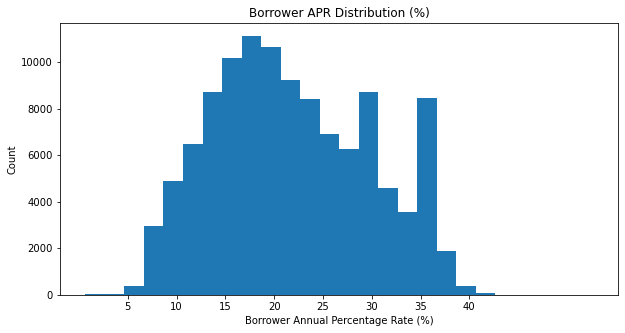

In [17]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrowe_APR_percentage = df_loan['BorrowerAPR']*100
bins = np.arange(df_loan['BorrowerAPR'].min()*100, df_loan['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

- We observe that the borrower APR often fluctuates between 15 and 20 percent, with a small increase to 35 percent.

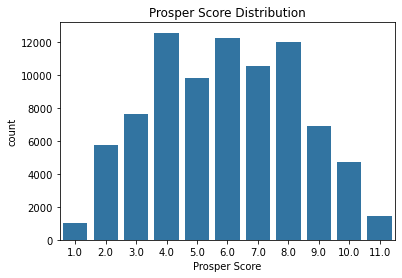

In [18]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=df_loan, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

- The most frequent Prosper Score numbers are 4, 6, and 8, and they are almost regularly distributed.

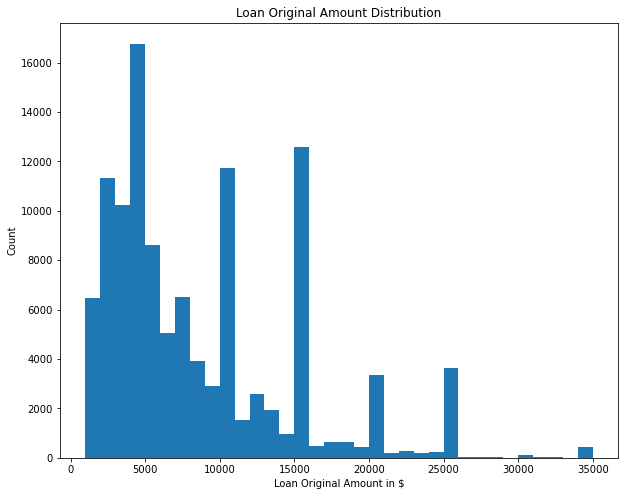

In [19]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(df_loan['LoanOriginalAmount'].min(), df_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

- We can see that the distribution has a long tail and is right skewed, so I'll test it in log scale to observe it more clearly.

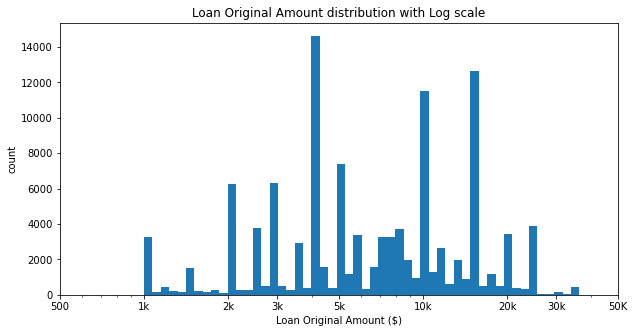

In [20]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.030
bins = 10 ** np.arange(3, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

- The largest original loan amount is from 3k to 5k. Additionally, I see an uptick between 10K and 20K.

In [21]:
#Checking loans' term (expressed in months)
df_loan['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

- In light of this, we can see that years can be expressed as either 1 year (12 months), 3 years (36 months), or 5 years (60 months)

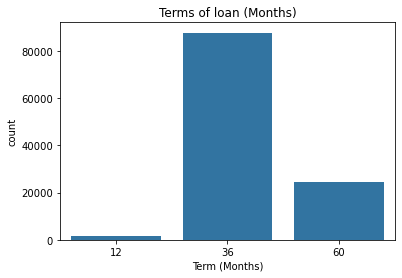

In [22]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_loan,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

- From observation we can see that out of the terms 36 months has the highest values.

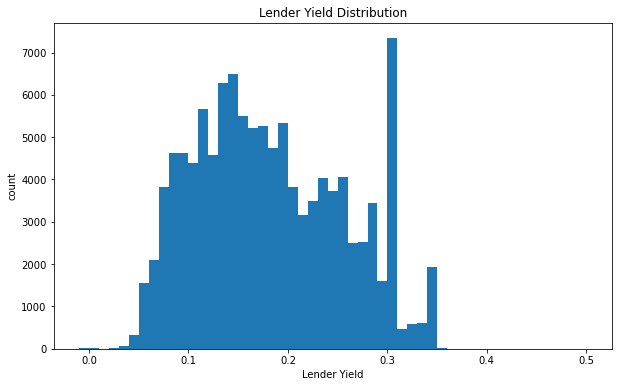

In [23]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(df_loan['LenderYield'].min(), df_loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loan, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

- Lender Yield is observed to be normally distributed, with the majority of values falling between 0.1 and 0.2, with an increase at 0.3.

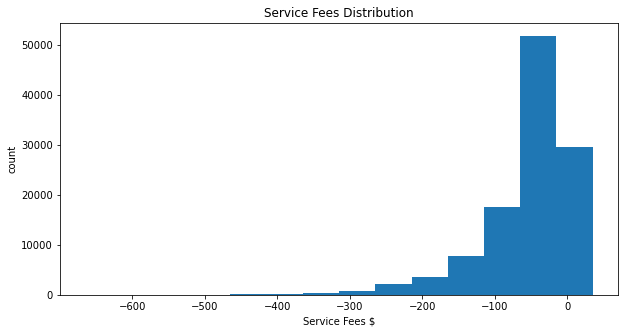

In [24]:
# Service Fees Distribution
binsize = 50
bins = np.arange(df_loan['LP_ServiceFees'].min(), df_loan['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loan, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.ylabel('count')
plt.show()

- Service fees are left skewed, as we can see, but the negative values prevent us from putting them on the log scale.

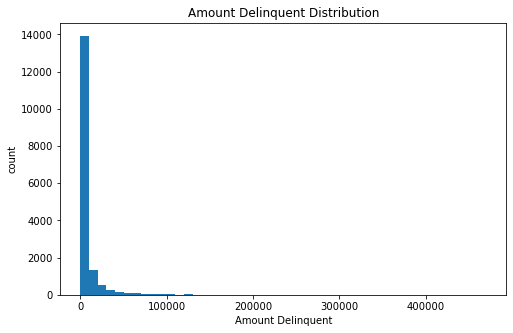

In [25]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(df_loan['AmountDelinquent'].min(), df_loan['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan[df_loan['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count')
plt.show()

In [26]:
df_loan['AmountDelinquent'].max()


463881.0

In [27]:
df_loan['AmountDelinquent'].min()


0.0

In [28]:
df_loan['AmountDelinquent'].value_counts()


0.0        89818
50.0          73
100.0         67
25.0          66
30.0          65
           ...  
14910.0        1
1280.0         1
13180.0        1
2023.0         1
5062.0         1
Name: AmountDelinquent, Length: 7059, dtype: int64

- We can see that Amount Delinquent is right-skewed, but this makes it difficult to draw conclusions. Therefore, let's try log scale.
- Additionally, the majority of the loans are current as we can see from the 89818 delinquencies at 0 percent. This should be checked in log-scale.

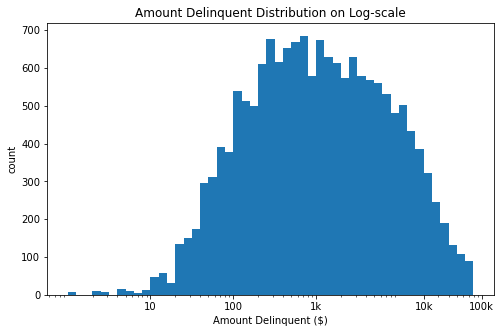

In [29]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

- It is evident that the majority of past-due sums are around $1,000, and they are often distributed.

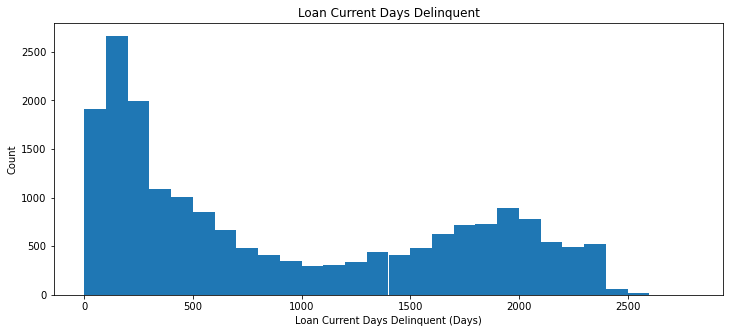

In [30]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df_loan['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loan[df_loan['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

- The bimodal distribution of delinquencies places the majority of them in the first 500 days.

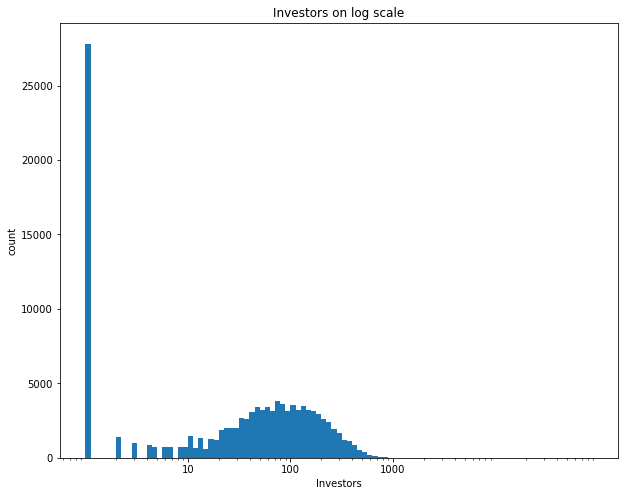

In [31]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loan, x = 'Investors', bins = bins)
plt.title('Investors on log scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count')
plt.show()

- Most loans has around 100 investors



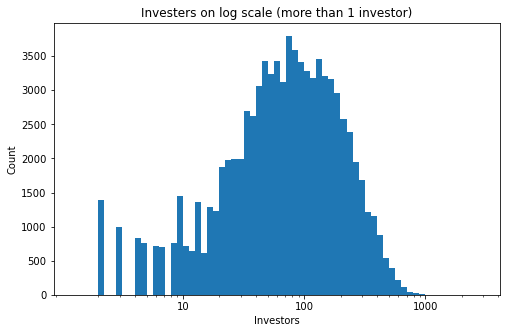

In [32]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

- As anticipated from the preceding one, the number of investors (for data with number of investors greater than 1) is fairly regularly distributed around 100.

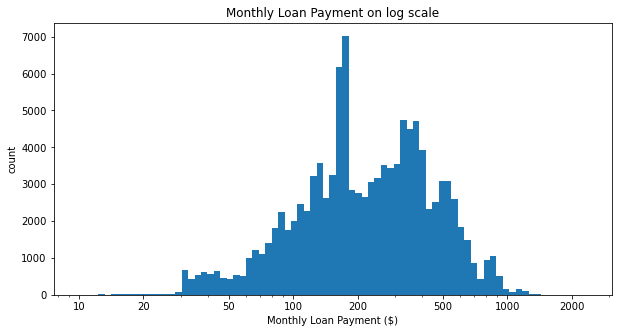

In [33]:
# Monthly loan payment distribution Using log-scale
log_binsize = 0.030
bins = 10 ** np.arange(1, np.log10(df_loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

- The distribution of the loan often has a peak between 100 and 200 and some increases between 300 and 500.

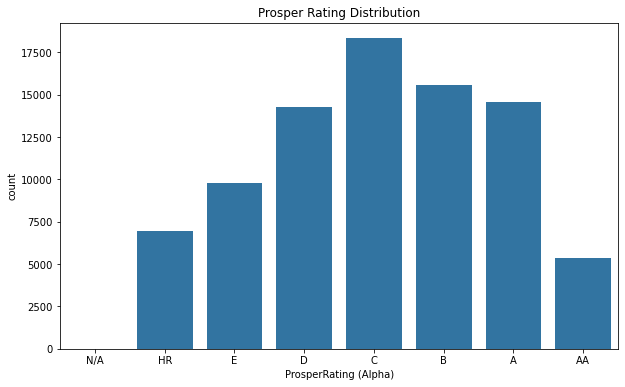

In [34]:
# Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sb.countplot(data=df_loan,x='ProsperRating (Alpha)',color=base_color);
plt.title('Prosper Rating Distribution');

- Most Borrower's get ProsperRating of 'C'.

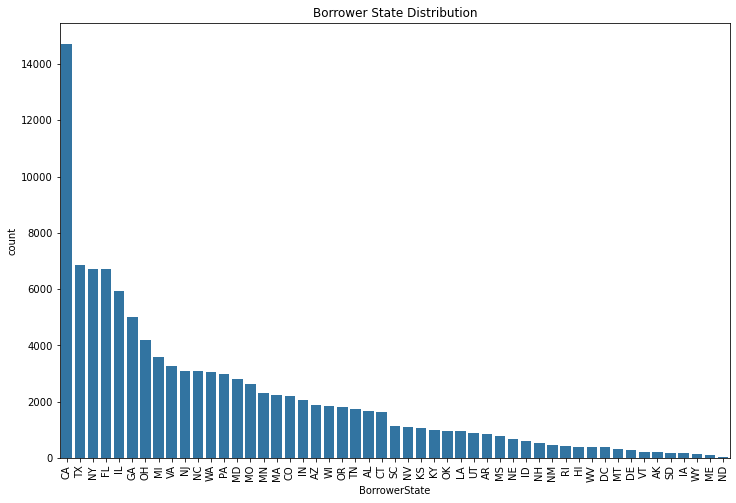

In [35]:
#Borrower State Distrobution
cat_order = df_loan['BorrowerState'].value_counts().index
plt.figure(figsize=[12, 8])
sb.countplot(data=df_loan,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

- We can observe that the three states with the highest numbers of loans originated at that time were California (CA), Texas (TX), and New York (NY).

Text(0.5, 1.0, 'Borrower Income Range Distribution')

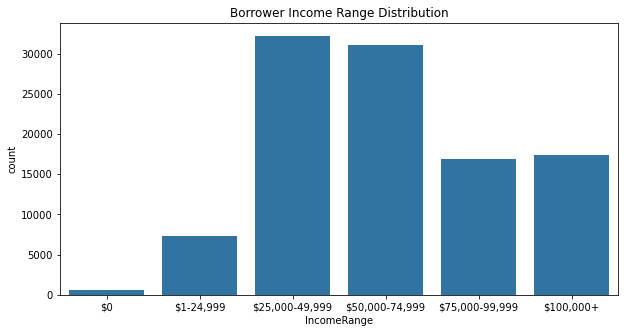

In [36]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loan,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')

- We can observe that those with incomes between 25,000 and 49,999 are the ones that take out loans the most.

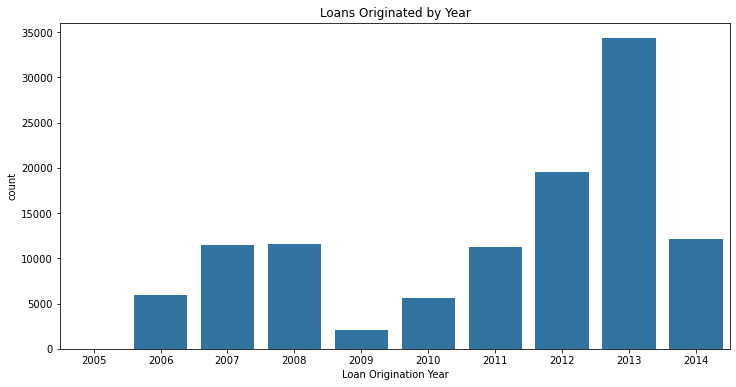

In [37]:
# Loan Origination by Year
plt.figure(figsize=[12, 6])
sb.countplot(data=df_loan,x=df_loan['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

- Loans can be seen to have decreased in 2009, but they then gradually increased until they peaked in 2013.

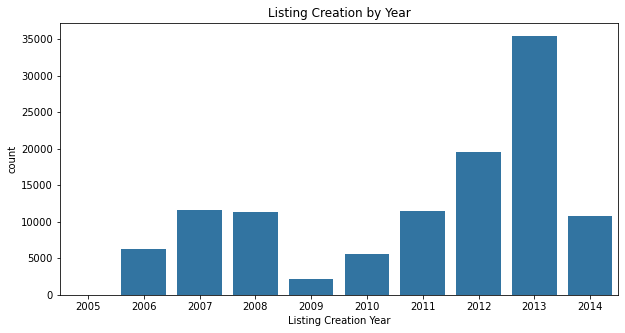

In [38]:
# Listing Creation  by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loan,x=df_loan['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

- We generally create the list every year, so this discovery is consistent with the preceding chart and is not surprising.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶
> I applied a log transformation to the distribution of loan original amount, which is right skewed, in order to interpret the picture. These variables, Monthly Loan Payment, Investors, and Amount Delinquent, likewise underwent the log transformation.

>Most loans were originated in the year 2013. The state of California (CA) had the most loans. Although the service costs were left skewed, I was unable to apply the log scale due to the negative amounts.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶
> The distribution was truly on a wide scale and I couldn't see it well because of the large difference between the AmountDelinquent values, so I applied the log transformation.
A log scale was used to represent the concealed distribution in some places for features with long-tailed, skewed distributions.

## Bivariate Exploration¶
> We need to recognize numerical and categorical properties in order to choose the appropriate chart type to explore variables in pairs.

In [39]:
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  category      
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   ProsperRating (Alpha)      84853 non-null   category      
 8   ProsperScore               84853 non-null   float64       
 9   ListingCategory (numeric)  113937 non-null  category      
 10  BorrowerState              108422 non-null  category      
 11  Occupation                 110349 non-null  category

In [40]:
#Numeric Variables
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent']

In [41]:
#Categorical Variables
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

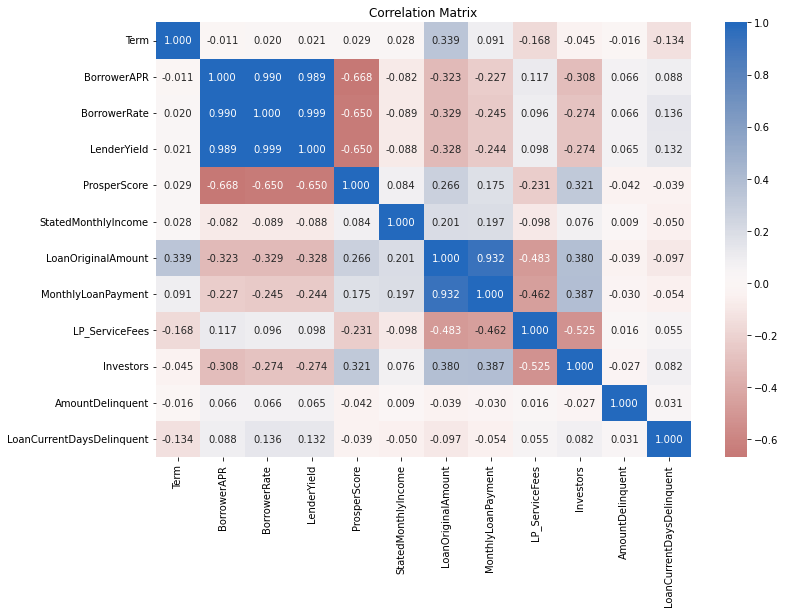

In [42]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(df_loan[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

#### Which profession is known to taking loan the most/least? 

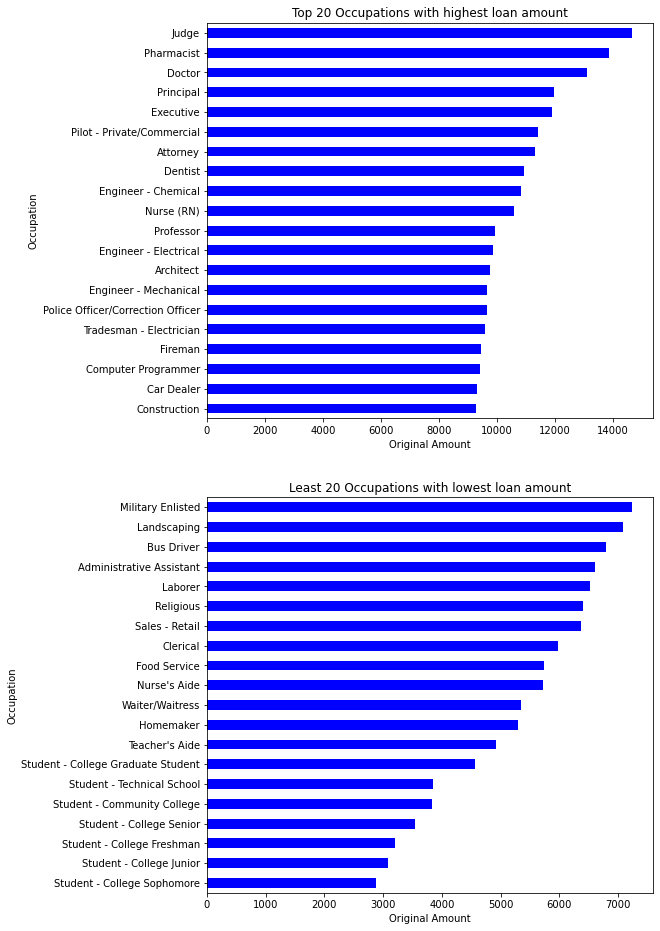

In [43]:
plt.figure(figsize = [8, 16])  

plt.subplot(2,1,1)
top_occupation = df_loan.groupby('Occupation').LoanOriginalAmount.mean().sort_values()[-20:]
top_occupation.plot(kind = "barh", color = 'blue')
plt.xlabel('Original Amount')
plt.title('Top 20 Occupations with highest loan amount')

plt.subplot(2,1,2)
least_occupation = df_loan.groupby('Occupation').LoanOriginalAmount.mean().sort_values()[:20]
least_occupation.plot(kind = "barh", color = 'blue')
plt.xlabel('Original Amount')
plt.title('Least 20 Occupations with lowest loan amount');

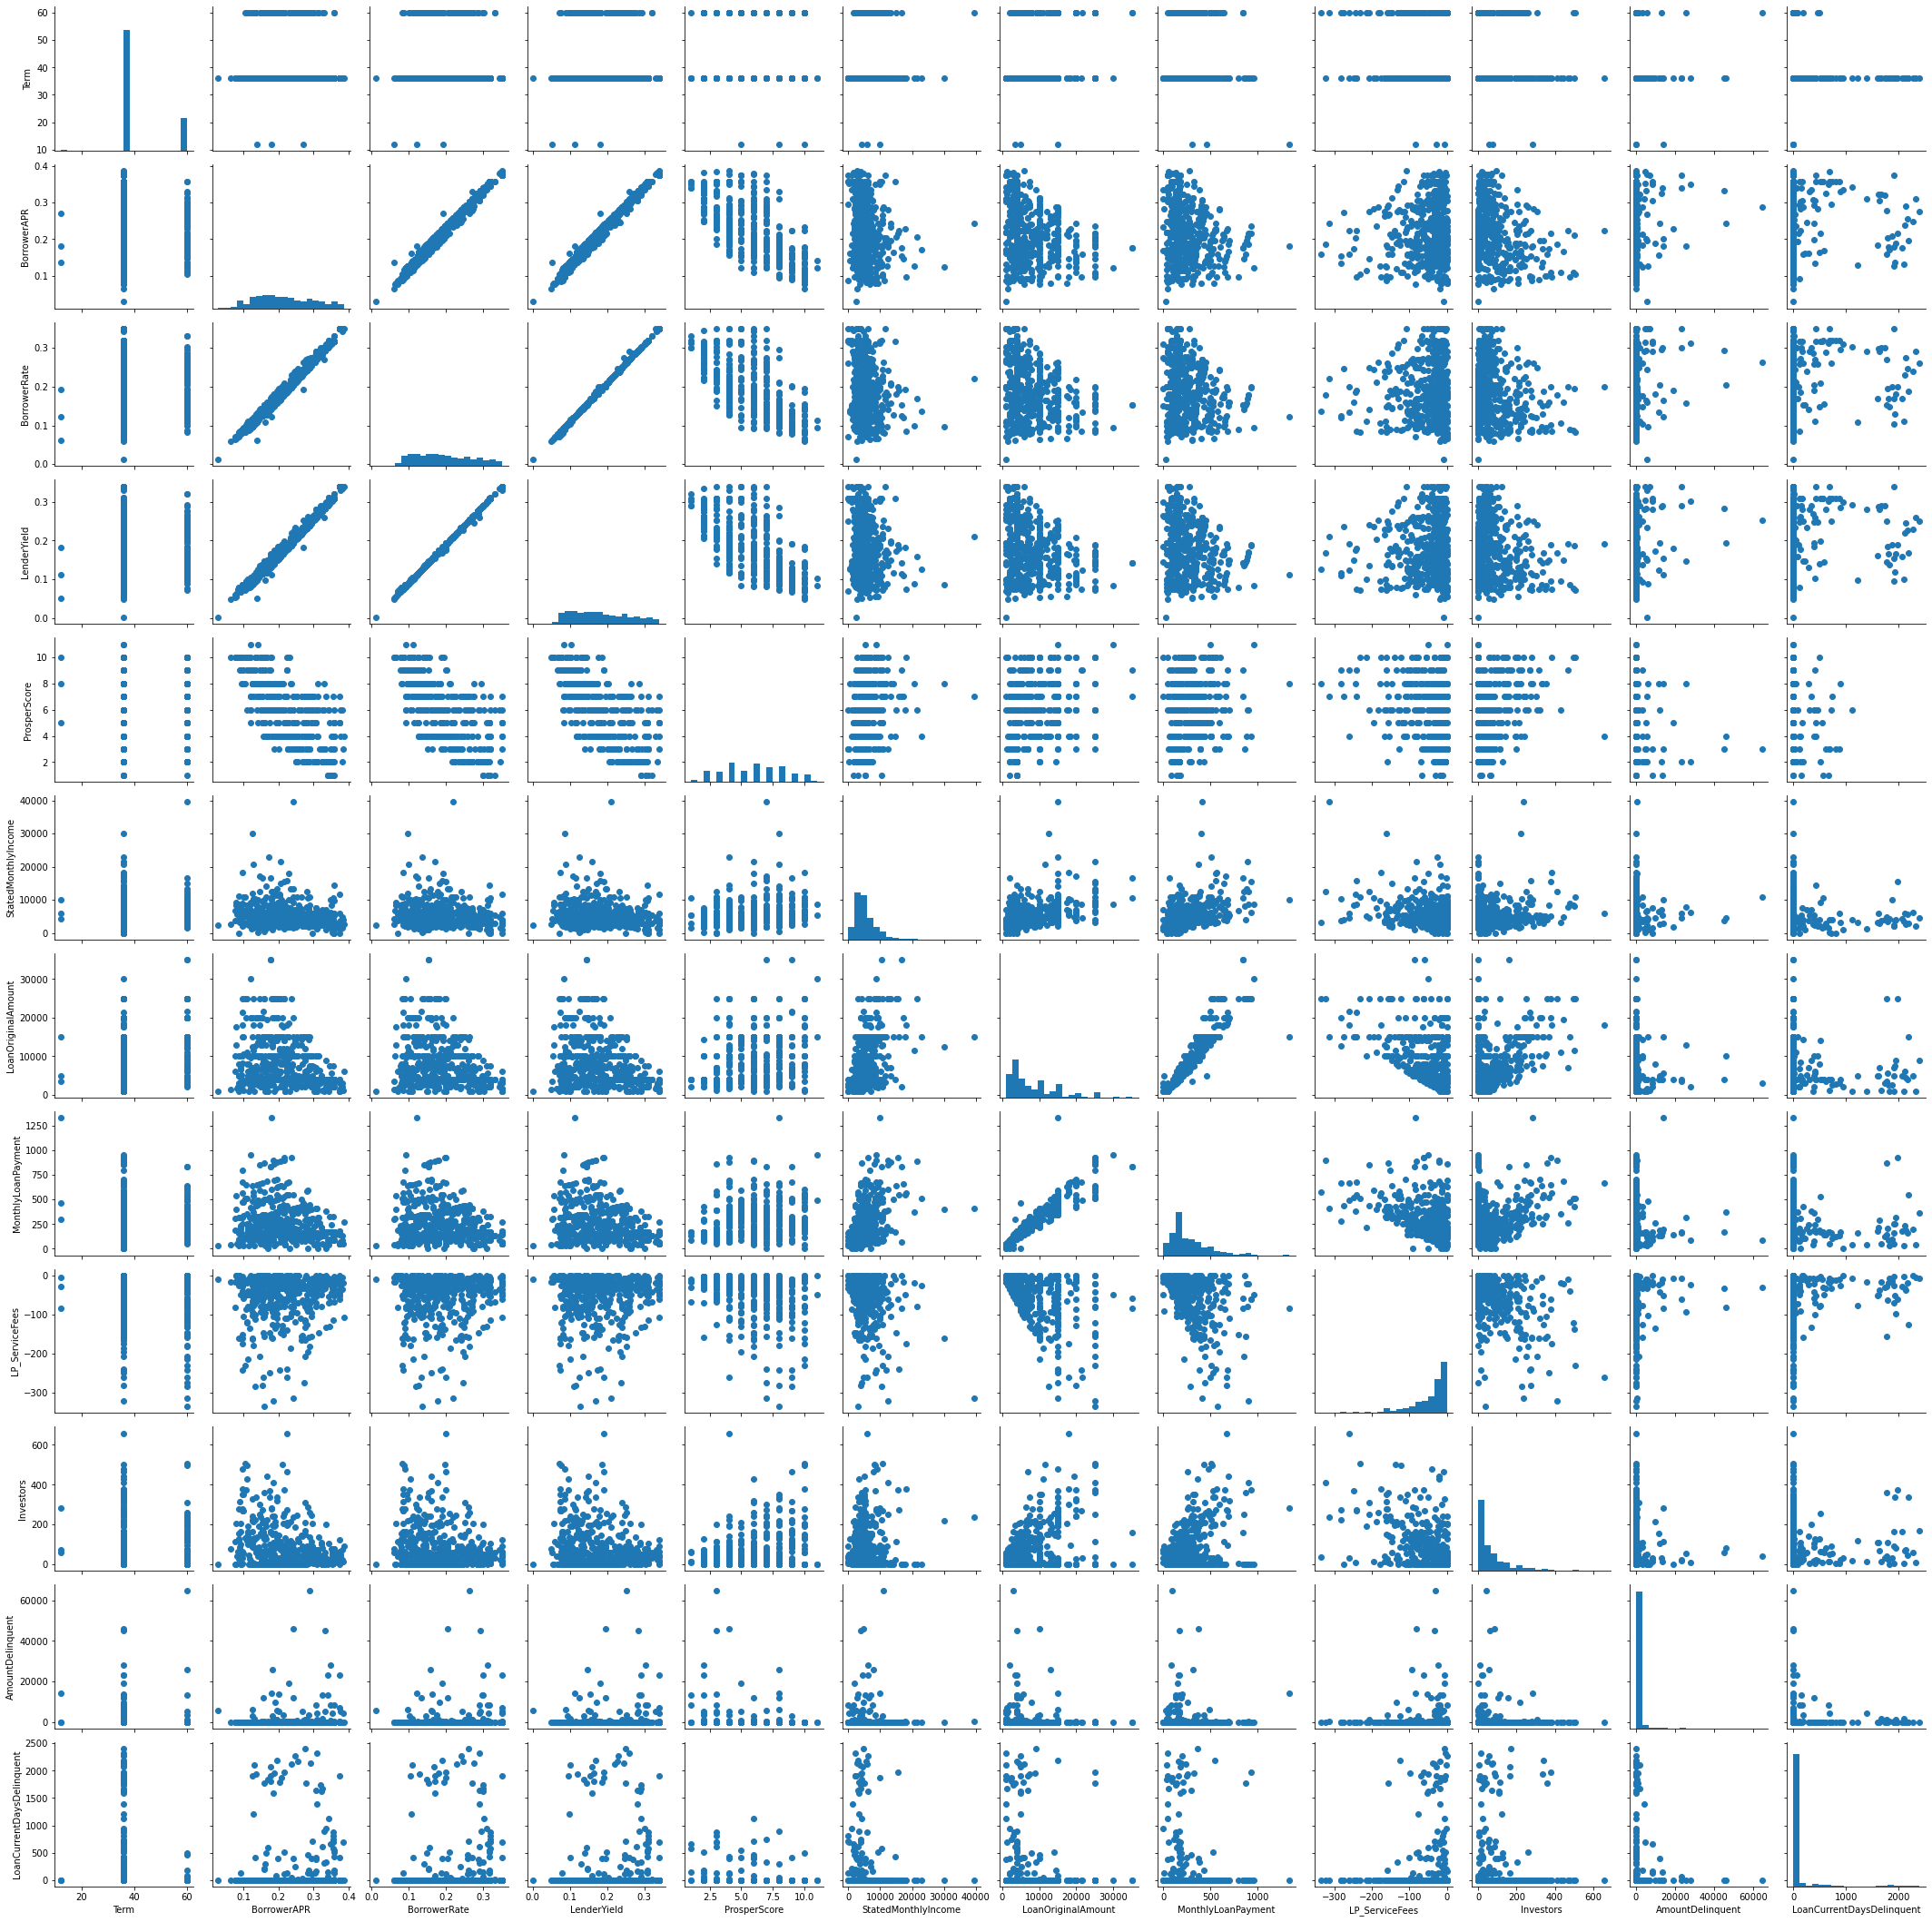

In [44]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_loan.shape[0], 500, replace = False)
df_loan_samp = df_loan.loc[samples,:]

g = sb.PairGrid(data = df_loan_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

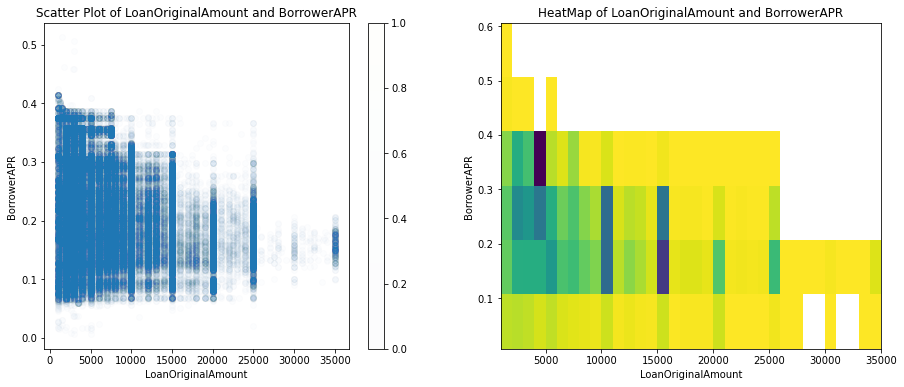

In [46]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(df_loan['LoanOriginalAmount'].min(), df_loan['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df_loan['BorrowerAPR'].min(), df_loan['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

- Large loans have a substantially lower annual interest rate from the borrower since there is a negative correlation between the Loan's original amount and the Borrower's APR.

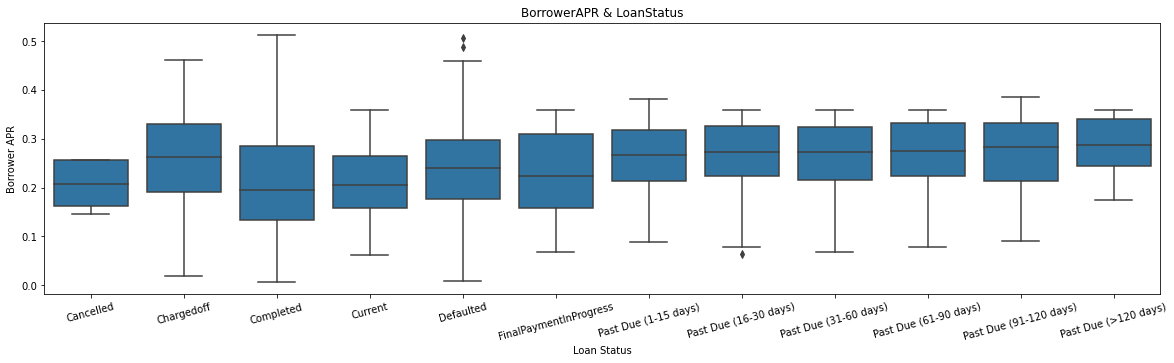

In [47]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sb.boxplot(data=df_loan,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

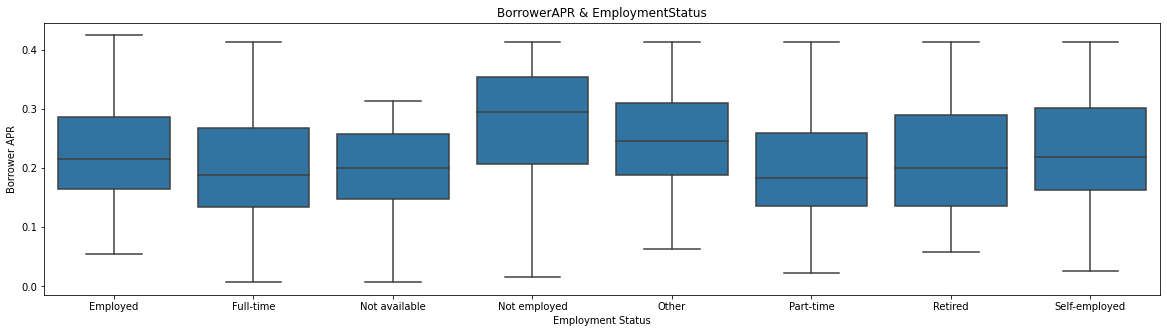

In [51]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=df_loan,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

- On the graph of BorrowerAPR versus LoanStatus, we can see that current and completed loans have lower rates and mean values than past-due loans.
- Working individuals have a lower IQR than those who are not employed, as shown on the graph of borrower APR vs. employment status.

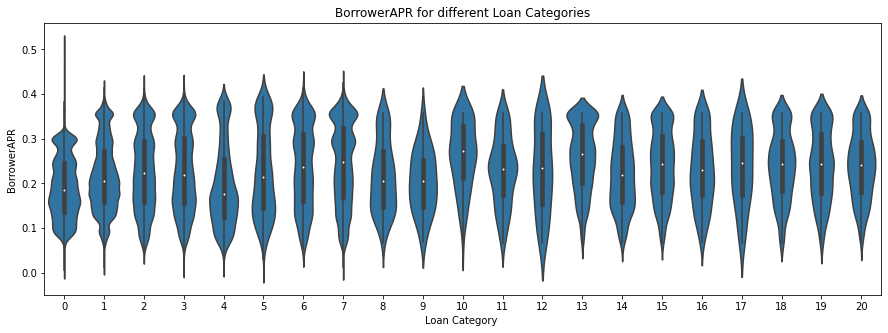

In [52]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=df_loan,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('BorrowerAPR for different Loan Categories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

- We can see that Cosmetic Procedures have higher interest rates with evenly dispersed data.
- Listing Category: The grouping the borrower chose for their listing when they posted it: Not Available (0), (1) - Consolidating Debt, (2) - Improvement of the home Business,(3) Personal Loan (4), Student Use (5), and Auto, Other,(6) Baby & Adoption, 8 9 - Boat, 10 Cosmetic Surgery, 11 - Ring of engagement, Green Loans (12), Household Expenses, Code 13 14 - Significant Purchases (15) - Dental/Medical, (16) - Motorbike (17), "RV," (18), "Taxes," Vacation, (19), 20 
- Loans for weddings and Working individuals have a lower IQR than those who are not employed, as shown in the borrower APR vs. Employment status graph.

> check data dict to see listing category more clear (https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> When compared to those who are employed, those without jobs pay higher interest rates.
The interest rate decreases as income increases.
Following the financial crisis of 2008, the initial loan amount was at its lowest; since then, it has risen year over year. From 2013 to 2014, the amount dramatically increases.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- 36 months loan Term seems to be common to all employment status and loan status,
- Larger percentage of the loan takers are employed.
- Unemployed and part-time workers are mostly the ones without home.
- There's a positive correlation between amount of loan and payment term.
- Judges, pharmacist and Doctor are leading the chart of highest loan takers while students take the least loan.

## Multivariate Exploration


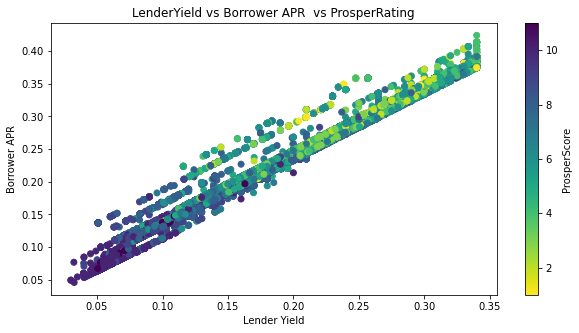

In [53]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loan,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

- The correlation between every variable is evident, as can be seen. When borrowers pay more interest, the lender yield rises, which is why the borrower APR and lender yield have a direct positive correlation. Lower borrower interest rates are caused by higher credit scores, which also means lower lender yields.

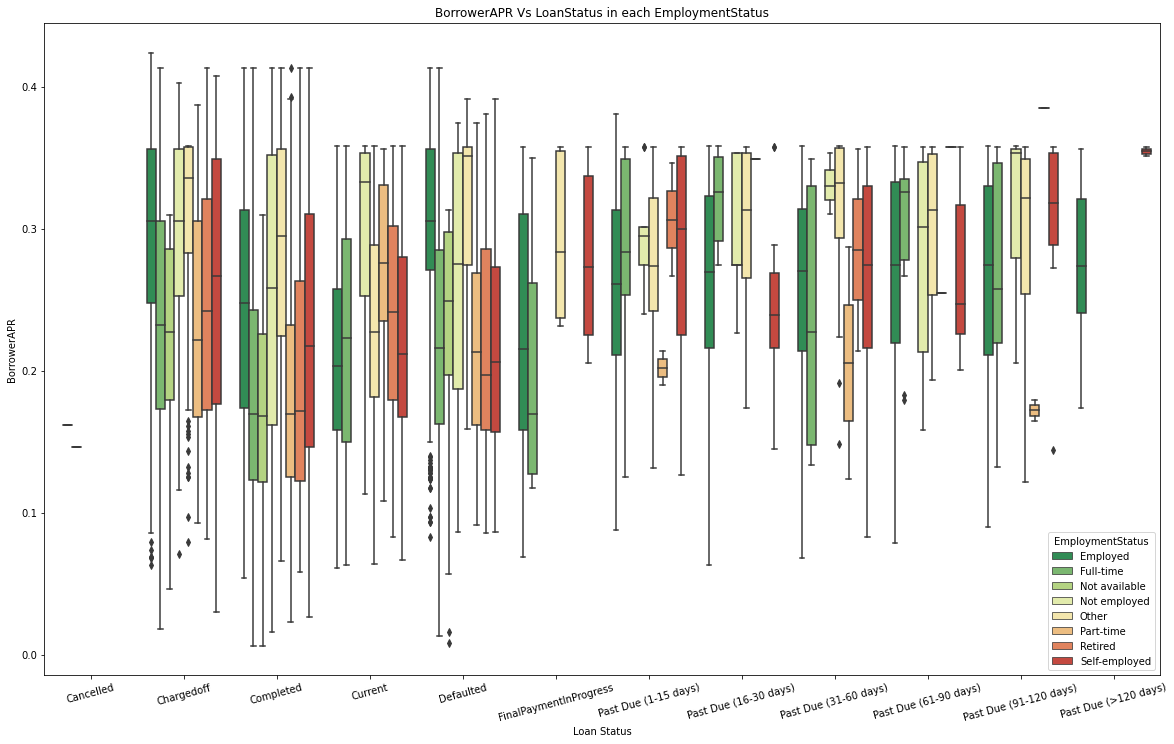

In [54]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=df_loan, palette="RdYlGn_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

- The loan status category with the lowest APR is employed and full-time employment. The APR for those who are unemployed is the highest.
- The majority of the high borrowerAPRs are chargeoffs that have been completed and are current.
- We observe certain anomalies in the chargeoff and defaulted loan status.

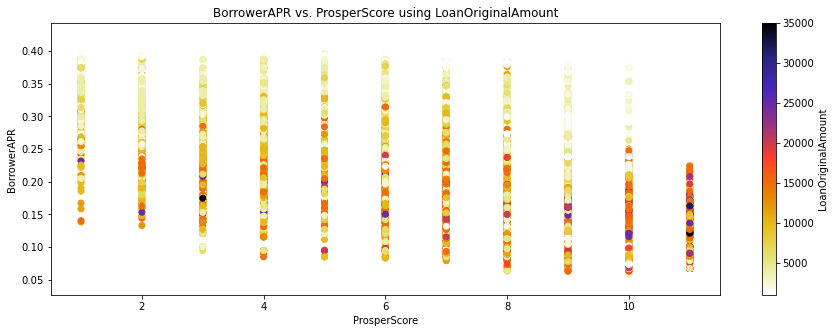

In [55]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=df_loan[df_loan['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

- We can see that borrowers with higher prosper scores take out the majority of loans for sums over $20,000. (10 and above)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> EmploymentStatus, LoanStatus, and BorrowerAPR Relationship:

- Employed people exhibit a wide range of loan statuses and borrower APRs; for example, they occasionally have high borrower rates, as in chargeoffs, and occasionally low borrower rates, as in past dues.
- All loan status categories generally have lower BorrowerAPRs for employees who work full-time and part-time.
- Employees who are Not-Employed & Self-Employed typically have lower BorrowerAPR in the current and finished statuses but higher BorrowerAPR in specific areas like the past dues.

### Were there any interesting or surprising interactions between features?
- ProsperScore and BorrowerAPR were discovered to be negatively correlated, as higher prosper scores indicate reduced risk associated with the loan, which in turn results in lower APRs, which further reduce yield.

## Conclusion
> After using some of the dataset's variables, it can be shown that BorrowerAPR is the only one that significantly affects BorrowerRate, with little to no association for the other variables. Many borrowers were found to be on 36-month payment terms, and as of the time the data was collected, the majority of them were still making payments while only a small number had their loan requests denied. Borrowers frequently take out loans to pay off debt, and 2013 had the greatest participation rate. The average loan amount was about 8200, with a rate of 0.19 and a payment of about 275 each month.